In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score
import sys
import os

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from itertools import combinations
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.about()
gnb.configuration()

pyAgrum version 0.18.1
(c) 2015-2020 Pierre-Henri Wuillemin, Christophe Gonzales, Lionel Torti

    This is free software; see the source code for copying conditions.
    There is ABSOLUTELY NO WARRANTY; not even for MERCHANTABILITY or
    FITNESS FOR A PARTICULAR PURPOSE.  For details, see 'pyAgrum.warranty'.
    


Library,Version
OS,posix [linux]
Python,"3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) [GCC 7.3.0]"
IPython,7.16.1
MatPlotLib,3.2.1
Numpy,1.19.5
pyAgrum,0.18.1


In [3]:
#pd.read_csv('../test_tables/studies_grouped.csv')#.to_csv('../test_tables/structured_student_r_min.csv', index=False)

In [4]:
learner=gum.BNLearner('../test_tables/studies_grouped.csv') #using bn as template for variables

In [9]:
learner.useLocalSearchWithTabuList()
learner.setMaxTime(300)
learner.setMaxIndegree(5)

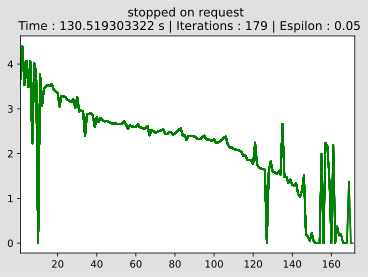

In [10]:
@np.vectorize
def pseudolog(x):
    seuil=2.0
    y=-x if x<0 else x
        
    if y<seuil:
        res=y*np.log10(seuil)/seuil
    else:
        res=np.log10(y)
        
    return res if x>0 else -res
gnb.animApproximationScheme(learner,
                            scale=pseudolog) # scale by default is np.log10
bn2=learner.learnBN()

In [11]:
print("Learned in {0}ms".format(1000*learner.currentTime()))


Learned in 130519.303322ms


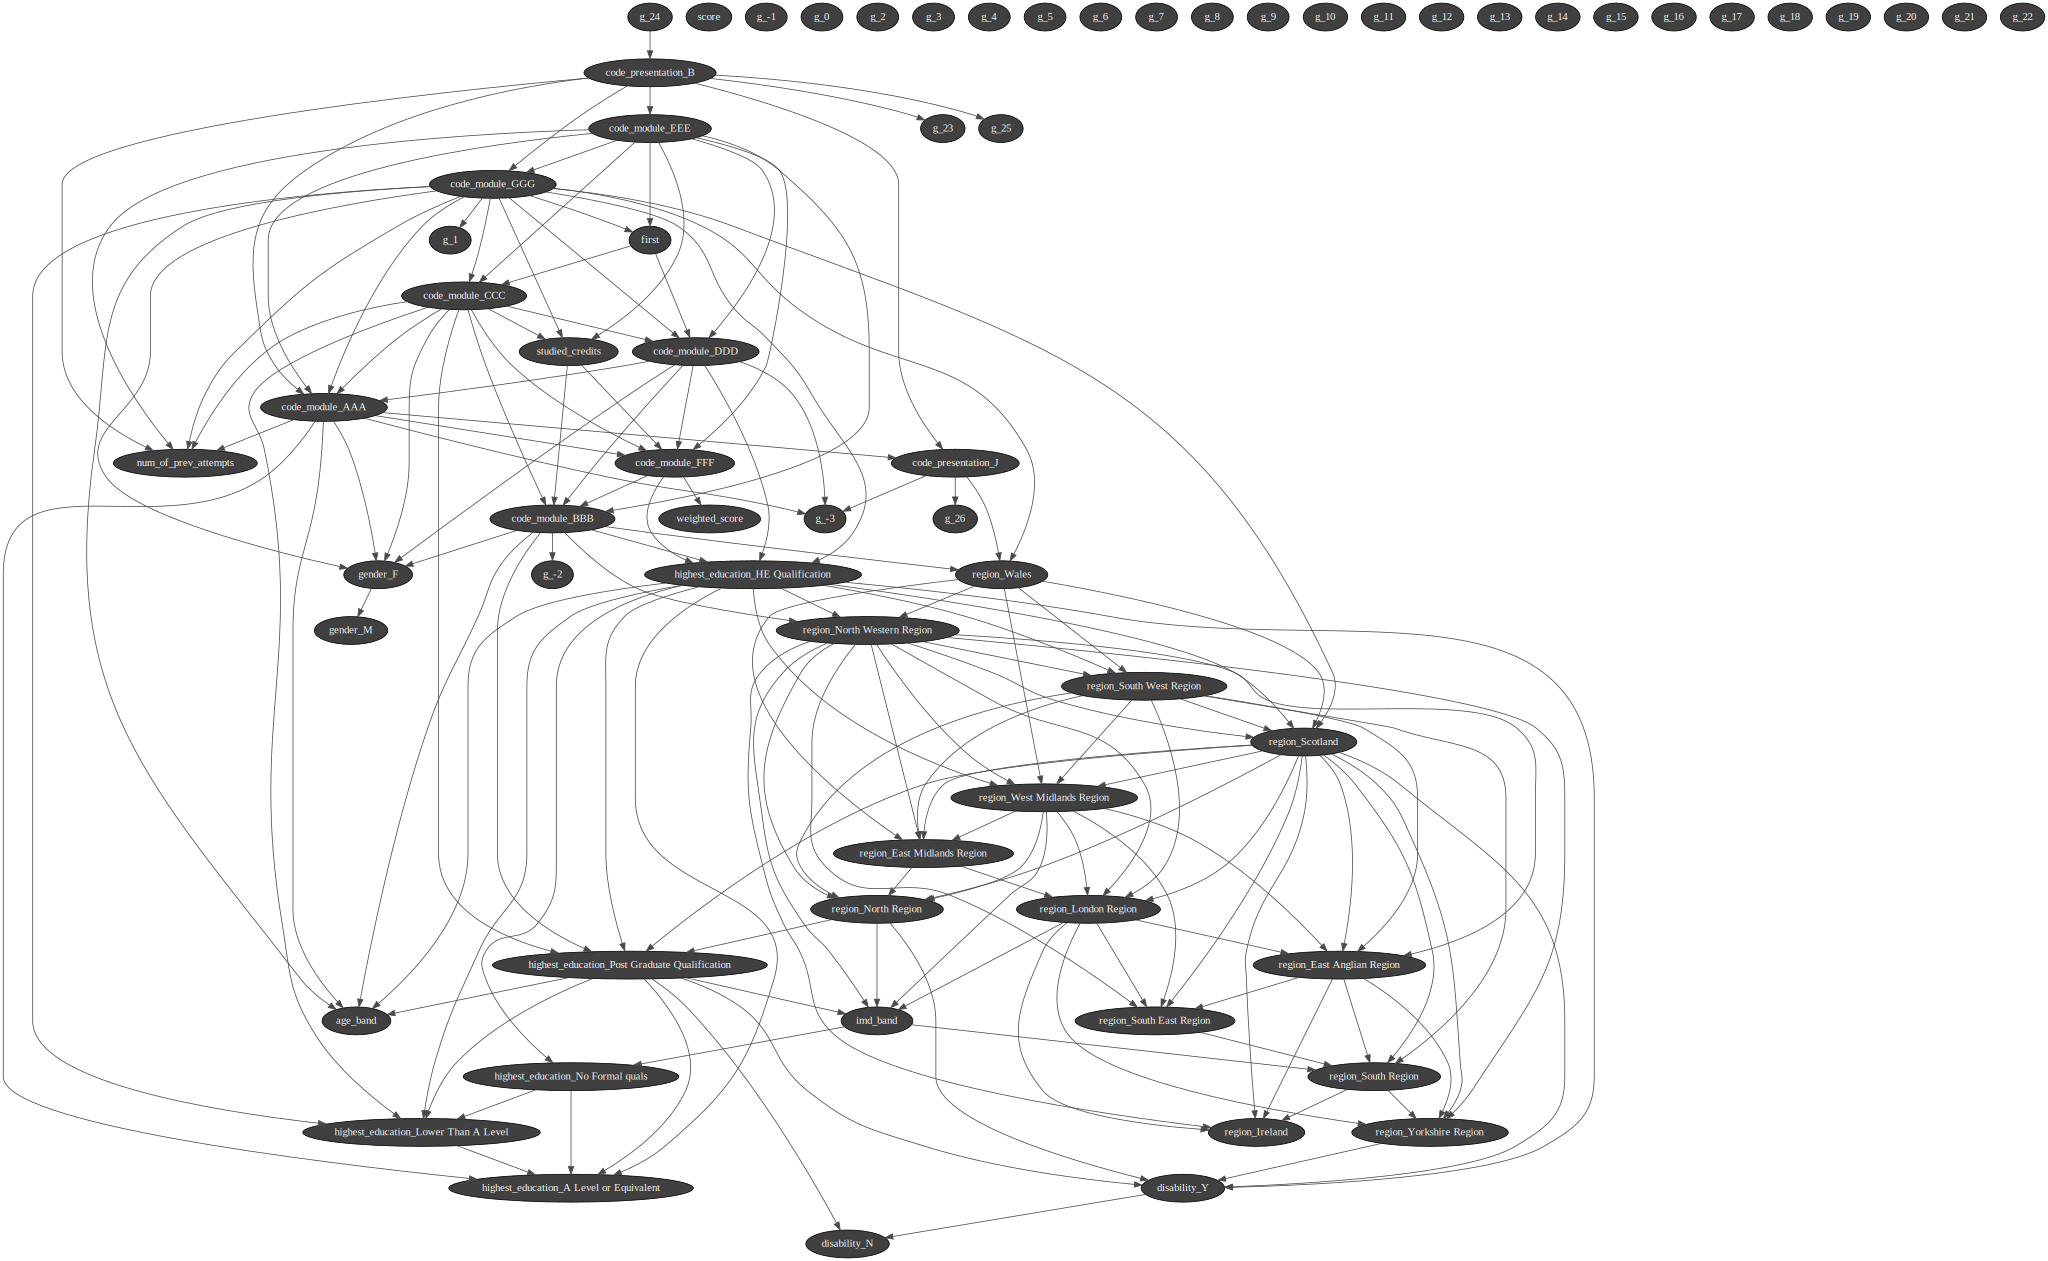

In [12]:
gnb.showBN(bn2,size =100)